In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [124]:
df=pd.read_csv('dataset.csv')

In [125]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [126]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [127]:
df.isnull().values.any()

False

In [128]:
# df=pd.get_dummies(df)
# df.head()
# print(X,y)
# df.describe()

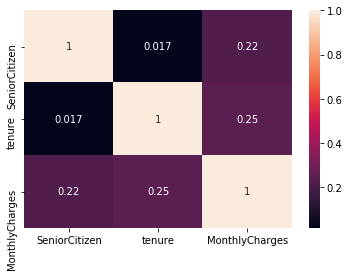

In [129]:
Var_Corr = df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [130]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [131]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [132]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [133]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [134]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [135]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [136]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]=df[i].replace({'No internet service' : 'No'})
df["MultipleLines"]=df["MultipleLines"].replace({'No phone service' : 'No'})

In [137]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [138]:
df["Partner"] = df["Partner"].replace({"Yes":1,"No":0})
df["Dependents"] = df["Dependents"].replace({"Yes":1,"No":0})
df["PhoneService"] = df["PhoneService"].replace({"Yes":1,"No":0})
df["MultipleLines"] = df["MultipleLines"].replace({"Yes":1,"No":0})
df["OnlineSecurity"] = df["OnlineSecurity"].replace({"Yes":1,"No":0})
df["OnlineBackup"] = df["OnlineBackup"].replace({"Yes":1,"No":0})
df["DeviceProtection"] = df["DeviceProtection"].replace({"Yes":1,"No":0})
df["TechSupport"] = df["TechSupport"].replace({"Yes":1,"No":0})
df["StreamingTV"] = df["StreamingTV"].replace({"Yes":1,"No":0})
df["StreamingMovies"] = df["StreamingMovies"].replace({"Yes":1,"No":0})
df["PaperlessBilling"] = df["PaperlessBilling"].replace({"Yes":1,"No":0})

In [139]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [140]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
5     9305-CDSKC  Female              0        0           0       8   
6     1452-KIOVK    Male              0        0           1      22   
7     6713-OKOMC  Female              0        0           0      10   
8     7892-POOKP  Female              0        1           0      28   
9     6388-TABGU    Male              0        0           1      62   
10    9763-GRSKD    Male              0        1           1      13   
11    7469-LKBCI    Male              0        0           0      16   
12    8091-TTVAX    Male        

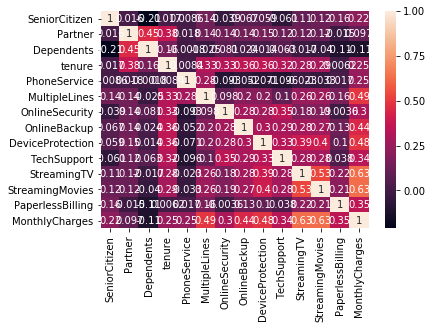

In [141]:
Var_Corr = df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [142]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

ValueError: could not convert string to float: 

In [ ]:
df.info()

In [ ]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [ ]:
labelencoder_X_0 = LabelEncoder()
X[:, 0] = labelencoder_X_0.fit_transform(X[:, 0])
# labelencoder_X_6 = LabelEncoder()
# X[:, 6] = labelencoder_X_6.fit_transform(X[:, 6])
labelencoder_X_7 = LabelEncoder()
X[:, 7] = labelencoder_X_7.fit_transform(X[:, 7])
labelencoder_X_14 = LabelEncoder()
X[:, 14] = labelencoder_X_14.fit_transform(X[:, 14])
labelencoder_X_16 = LabelEncoder()
X[:, 16] = labelencoder_X_16.fit_transform(X[:, 16])
X = X.astype(float)
labelencoder_y= LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
# print(X)

In [ ]:
onehotencoder0 = OneHotEncoder(categorical_features = [0])
X = onehotencoder0.fit_transform(X).toarray()
X = X[:,1:]

onehotencoder6 = OneHotEncoder(categorical_features = [6])
X = onehotencoder6.fit_transform(X).toarray()
X = X[:,1:]

onehotencoder7 = OneHotEncoder(categorical_features = [8])
X = onehotencoder7.fit_transform(X).toarray()
X = X[:,1:]

onehotencoder14 = OneHotEncoder(categorical_features = [15])
X = onehotencoder14.fit_transform(X).toarray()
X = X[:,1:]

onehotencoder16 = OneHotEncoder(categorical_features = [17])
X = onehotencoder16.fit_transform(X).toarray()
X = X[:,1:]